In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from fbprophet import Prophet
from fbprophet.diagnostics import performance_metrics
from dateutil.relativedelta import relativedelta

In [11]:
train_data = pd.read_csv('/kaggle/input/train-dataset/prepared_train.csv')

In [12]:
train_data.head()

,Date,Store,Avg_Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Type,Size,DateIndex
0,2010-02-05,1,22516.313699,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315,2010-02-05
1,2010-02-05,2,29273.828219,40.19,2.572,NaN,NaN,NaN,NaN,NaN,210.752605,8.324,False,A,202307,2010-02-05
2,2010-02-05,3,7101.880308,45.71,2.572,NaN,NaN,NaN,NaN,NaN,214.424881,7.368,False,B,37392,2010-02-05
3,2010-02-05,4,29248.546164,43.76,2.598,NaN,NaN,NaN,NaN,NaN,126.442065,8.623,False,A,205863,2010-02-05
4,2010-02-05,5,5115.695161,39.70,2.572,NaN,NaN,NaN,NaN,NaN,211.653972,6.566,False,B,34875,2010-02-05


In [13]:
train_data['Date'] = pd.to_datetime(train_data['Date'])

In [8]:
test_dataset = pd.read_csv('/kaggle/input/test-dataset/test_data.csv')

In [9]:
test_dataset.head()

,Store,Date,IsHoliday
0,1,2012-11-02,False
1,1,2012-11-09,False
2,1,2012-11-16,False
3,1,2012-11-23,True
4,1,2012-11-30,False


In [20]:
sales_dataset = train_data.rename(columns={'Date': 'ds', 'Avg_Weekly_Sales': 'y'})[['ds', 'y']]

In [51]:
sales_dataset.head()

,ds,y
0,2010-02-05,22516.313699
1,2010-02-05,29273.828219
2,2010-02-05,7101.880308
3,2010-02-05,29248.546164
4,2010-02-05,5115.695161


In [14]:
holidays_dates = train_data.loc[train_data.IsHoliday == True, 'Date']

In [16]:
holidays_dates.drop_duplicates(inplace = True)

In [17]:
holidays_dates.head()

45     2010-02-12
1395   2010-09-10
1890   2010-11-26
2115   2010-12-31
2385   2011-02-11
Name: Date, dtype: datetime64[ns]

In [18]:
holidays_dates = pd.DataFrame(holidays_dates)
holidays_dates['holiday'] = 'is_holiday'

In [24]:
holidays_dates.rename(columns={'Date':'ds'}, 
                     inplace = True)

In [25]:
holidays_dates.head()

,ds,holiday
45,2010-02-12,is_holiday
1395,2010-09-10,is_holiday
1890,2010-11-26,is_holiday
2115,2010-12-31,is_holiday
2385,2011-02-11,is_holiday


In [26]:
my_model = Prophet(interval_width = 0.95, holidays = holidays_dates)
my_model.fit(sales_dataset)

In [28]:
test_dataset.head()

,Store,Date,IsHoliday
0,1,2012-11-02,False
1,1,2012-11-09,False
2,1,2012-11-16,False
3,1,2012-11-23,True
4,1,2012-11-30,False


In [29]:
test_dataset.Date.agg({min, max})

max    2013-07-26
min    2012-11-02
Name: Date, dtype: object

In [44]:
qty_weeks = len(pd.date_range(start=test_dataset.Date.min(), end=test_dataset.Date.max(), freq='W'))
qty_weeks

38

In [31]:
future_dates = pd.DataFrame(test_dataset.rename(columns={'Date': 'ds'})['ds'], columns=['ds'])

In [32]:
future_dates.head()

,ds
0,2012-11-02
1,2012-11-09
2,2012-11-16
3,2012-11-23
4,2012-11-30


In [52]:
train_dates = pd.DataFrame(sales_dataset.rename(columns={'Date': 'ds'})['ds'], columns=['ds'])

In [53]:
train_dates.head()

,ds
0,2010-02-05
1,2010-02-05
2,2010-02-05
3,2010-02-05
4,2010-02-05


In [54]:
train_forecast = my_model.predict(train_dates)

In [55]:
train_forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,holidays,...,is_holiday,is_holiday_lower,is_holiday_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2010-02-05,15592.750043,1975.069713,29799.062190,15592.750043,15592.750043,74.685246,74.685246,74.685246,0.0,...,0.0,0.0,0.0,74.685246,74.685246,74.685246,0.0,0.0,0.0,15667.435289
1,2010-02-05,15592.750043,1390.537472,30732.580575,15592.750043,15592.750043,74.685246,74.685246,74.685246,0.0,...,0.0,0.0,0.0,74.685246,74.685246,74.685246,0.0,0.0,0.0,15667.435289
2,2010-02-05,15592.750043,2283.443171,29711.340638,15592.750043,15592.750043,74.685246,74.685246,74.685246,0.0,...,0.0,0.0,0.0,74.685246,74.685246,74.685246,0.0,0.0,0.0,15667.435289
3,2010-02-05,15592.750043,2424.090547,29149.272523,15592.750043,15592.750043,74.685246,74.685246,74.685246,0.0,...,0.0,0.0,0.0,74.685246,74.685246,74.685246,0.0,0.0,0.0,15667.435289
4,2010-02-05,15592.750043,1519.044160,29218.599544,15592.750043,15592.750043,74.685246,74.685246,74.685246,0.0,...,0.0,0.0,0.0,74.685246,74.685246,74.685246,0.0,0.0,0.0,15667.435289


In [56]:
train_forecast.to_csv('train_forecast_fbprophet.csv', index=False)

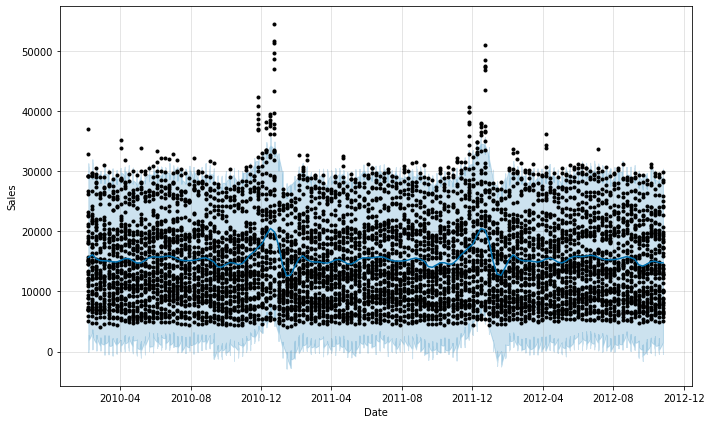

In [57]:
figure  = my_model.plot(train_forecast, xlabel='Date', ylabel='Sales')

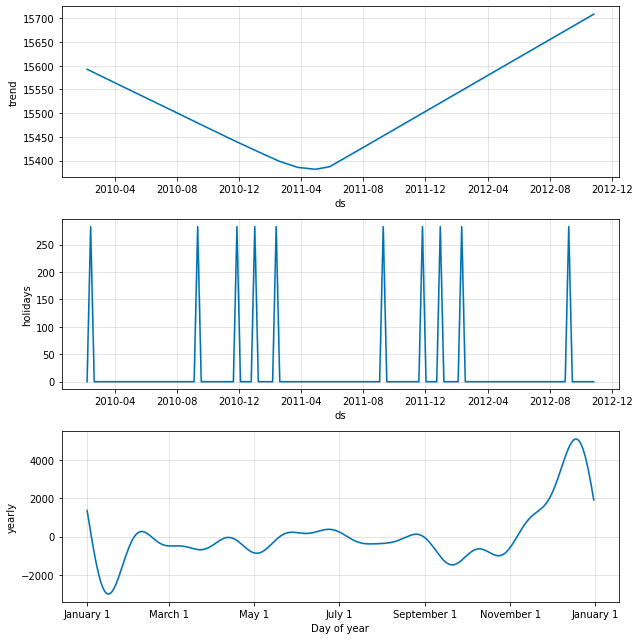

In [58]:
figure2  = my_model.plot_components(train_forecast)

In [59]:
train_forecast['cutoff'] = (train_forecast['ds'].min() - relativedelta(train_forecast['ds'].min(), days=1))

In [62]:
final_train_forecast = train_forecast.merge(sales_dataset, how = 'left', on ='ds')

In [63]:
final_train_forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,holidays,...,is_holiday_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat,cutoff,y
0,2010-02-05,15592.750043,1975.069713,29799.06219,15592.750043,15592.750043,74.685246,74.685246,74.685246,0.0,...,0.0,74.685246,74.685246,74.685246,0.0,0.0,0.0,15667.435289,2010-02-04,22516.313699
1,2010-02-05,15592.750043,1975.069713,29799.06219,15592.750043,15592.750043,74.685246,74.685246,74.685246,0.0,...,0.0,74.685246,74.685246,74.685246,0.0,0.0,0.0,15667.435289,2010-02-04,29273.828219
2,2010-02-05,15592.750043,1975.069713,29799.06219,15592.750043,15592.750043,74.685246,74.685246,74.685246,0.0,...,0.0,74.685246,74.685246,74.685246,0.0,0.0,0.0,15667.435289,2010-02-04,7101.880308
3,2010-02-05,15592.750043,1975.069713,29799.06219,15592.750043,15592.750043,74.685246,74.685246,74.685246,0.0,...,0.0,74.685246,74.685246,74.685246,0.0,0.0,0.0,15667.435289,2010-02-04,29248.546164
4,2010-02-05,15592.750043,1975.069713,29799.06219,15592.750043,15592.750043,74.685246,74.685246,74.685246,0.0,...,0.0,74.685246,74.685246,74.685246,0.0,0.0,0.0,15667.435289,2010-02-04,5115.695161


In [65]:
final_train_forecast.to_csv('final_train_forecast.csv', index=False)

In [67]:
fb_metrics_train = performance_metrics(final_train_forecast)
fb_metrics_train

,horizon,mse,rmse,mae,mape,mdape,coverage
0,99 days,4.731551e+07,6878.627061,5683.367948,0.488721,0.332434,0.972364
1,106 days,4.680594e+07,6841.486907,5659.926096,0.490160,0.336279,0.973268
2,113 days,4.668464e+07,6832.615646,5658.193255,0.490116,0.337759,0.974211
3,120 days,4.760096e+07,6899.344986,5712.191214,0.488131,0.337759,0.971375
4,127 days,4.798835e+07,6927.362345,5734.356454,0.488631,0.340371,0.970609
...,...,...,...,...,...,...,...
124,967 days,4.662438e+07,6828.204478,5788.754993,0.492740,0.351763,0.975602
125,974 days,4.680977e+07,6841.766382,5792.017077,0.491689,0.352143,0.973354
126,981 days,4.601666e+07,6783.558345,5749.298668,0.492328,0.351019,0.974163
127,988 days,4.573412e+07,6762.700421,5731.696667,0.492512,0.351763,0.974176


In [68]:
fb_metrics_train.to_csv('fbprophet_metrics_train_data.csv', index = False)

In [34]:
test_forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,holidays,...,is_holiday,is_holiday_lower,is_holiday_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2012-11-02,15713.256047,961.528282,29849.975937,15713.069772,15713.415208,-433.202205,-433.202205,-433.202205,0.0,...,0.0,0.0,0.0,-433.202205,-433.202205,-433.202205,0.0,0.0,0.0,15280.053842
1,2012-11-02,15713.256047,1074.225073,28995.031266,15713.069772,15713.415208,-433.202205,-433.202205,-433.202205,0.0,...,0.0,0.0,0.0,-433.202205,-433.202205,-433.202205,0.0,0.0,0.0,15280.053842
2,2012-11-02,15713.256047,1031.386814,28540.262822,15713.069772,15713.415208,-433.202205,-433.202205,-433.202205,0.0,...,0.0,0.0,0.0,-433.202205,-433.202205,-433.202205,0.0,0.0,0.0,15280.053842
3,2012-11-02,15713.256047,1729.894758,29422.227735,15713.069772,15713.415208,-433.202205,-433.202205,-433.202205,0.0,...,0.0,0.0,0.0,-433.202205,-433.202205,-433.202205,0.0,0.0,0.0,15280.053842
4,2012-11-02,15713.256047,1300.594828,30587.977911,15713.069772,15713.415208,-433.202205,-433.202205,-433.202205,0.0,...,0.0,0.0,0.0,-433.202205,-433.202205,-433.202205,0.0,0.0,0.0,15280.053842


In [35]:
test_forecast.to_csv('test_forecast_fbprophet.csv', index=False)

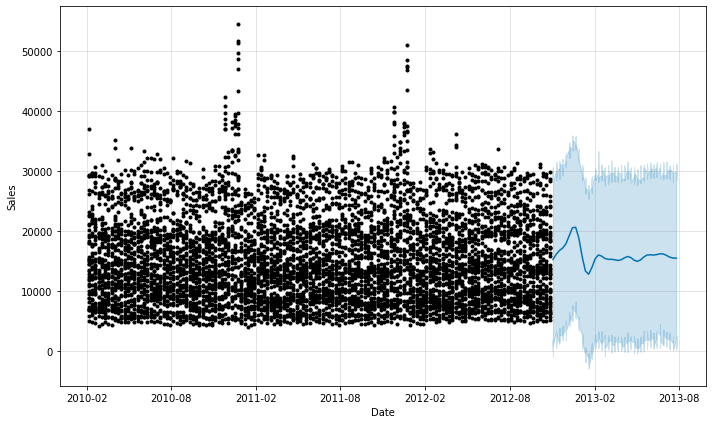

In [36]:
figure  = my_model.plot(test_forecast, xlabel='Date', ylabel='Sales')

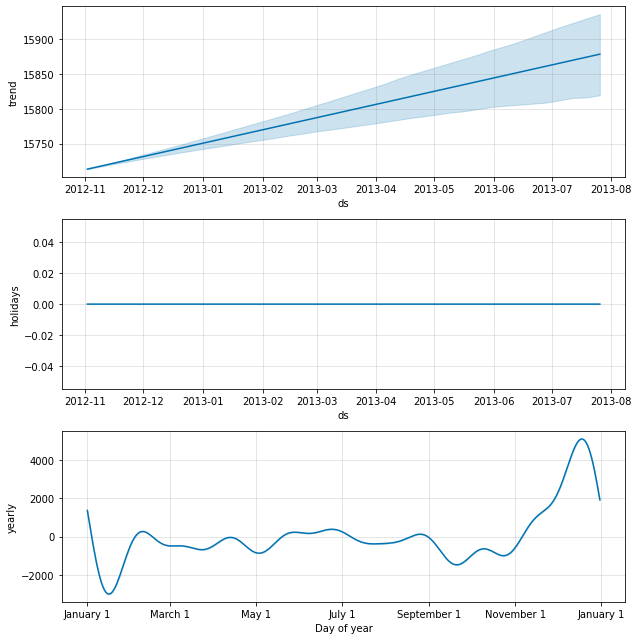

In [37]:
figure2  = my_model.plot_components(test_forecast)

In [49]:
test_forecast['cutoff'] = (test_forecast['ds'].min() - relativedelta(test_forecast['ds'].min(), days=1))

In [50]:
df_p = performance_metrics(test_forecast)
df_p.head()

KeyError: 'y'